**Знайомство з Pandas. Перше завдання (перша з двох частин)**

Перші рядки методом head

Видалення з таблиці даних по всій країні, останній рядок таблиці

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

URL="https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
TABLE_NAME = "Коефіцієнт народжуваності в регіонах України"
data = pd.read_html(URL, match=TABLE_NAME)
df = data[0]
df.replace("—", np.nan, inplace=True)
# df = df[:-1]

# data[0].iloc[:, 1:] = data[0].iloc[:, 1:].replace({',': ''}, regex=True)
# data[0].iloc[:, 1:] = data[0].iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
# data[0].iloc[:, 1:] = data[0].iloc[:, 1:].div(10)

df.head().round(2)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN


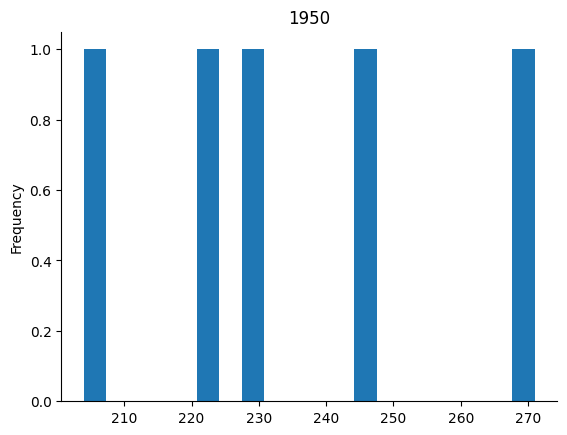

In [148]:
from matplotlib import pyplot as plt
_df_0['1950'].plot(kind='hist', bins=20, title='1950')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [149]:
df.tail(2).round(2)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
26,Севастополь,NaN,NaN,NaN,125,70,120,NaN,NaN
27,Україна,228.0,205.0,152.0,126,78,114,111,81


Видалення з таблиці даних по всій країні, останній рядок таблиці

In [150]:
df = df[:-1]
df.tail(2).round(2)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
25,Київ,NaN,174.0,159.0,120,73,120,121,110
26,Севастополь,NaN,NaN,NaN,125,70,120,NaN,NaN


Заміна NaN значення у DataFrame на середнє значення (mean) для кожного стовпця

In [151]:
# print("Типи стовпців до змін:")
# print(df.dtypes)

first_column = df.iloc[:, 0]
non_numeric_columns = df.columns[1:]
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')
df.iloc[:, 0] = first_column

# df.fillna(df.mean(), inplace=True)

# print("\nТипи стовпців після змін:")
# print(df.dtypes)

df.head().round(2)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,NaN


Відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [152]:
df.fillna(df.mean(), inplace=True)
df.head().round(2)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,111.44,80.17
1,Вінницька,224.0,192.0,142.0,124,84,112,109.00,76.00
2,Волинська,247.0,250.0,179.0,153,112,148,141.00,101.00
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.00,71.00
4,Донецька,271.0,214.0,140.0,109,61,98,82.00,80.17


Кількість рядків та стовпців через shape

In [153]:
rows, columns = df.shape
print(f"Кількість рядків: {rows}, Кількість стовпців: {columns}")

Кількість рядків: 27, Кількість стовпців: 9


Список регіонів, з рівнем народжуваності у 2019 році вищим за середній по Україні

In [154]:
print("")
average_birth_rate_2019 = df['2019'].mean()
average_birth_rate_2019 = round(average_birth_rate_2019, 2)
higher_than_average = df[df['2019'] > average_birth_rate_2019]
regions_higher_than_average = higher_than_average[['Регіон', '2019']]
print("Регіони з рівнем народжуваності вищим за середній у 2019 році:")
regions_higher_than_average.round({'2019': 2})


Регіони з рівнем народжуваності вищим за середній у 2019 році:


,Регіон,2019
0,Крим,80.17
2,Волинська,101.00
4,Донецька,80.17
6,Закарпатська,104.00
8,Івано-Франківська,88.00
11,Луганська,80.17
12,Львівська,87.00
14,Одеська,88.00
16,Рівненська,107.00
20,Херсонська,81.00


Регіон з найвищою народжуваністю у 2014 році

In [155]:
print("")
max_birth_rate_2014 = df['2014'].max()
region_highest_birth_rate_2014 = df[df['2014'] == max_birth_rate_2014]['Регіон'].values[0]
print(f"{region_highest_birth_rate_2014} область була найвищою за нороджуваністю у 2014 році.")


Рівненська область була найвищою за нороджуваністю у 2014 році.


Діаграм народжуваності по регіонах у 2019 році

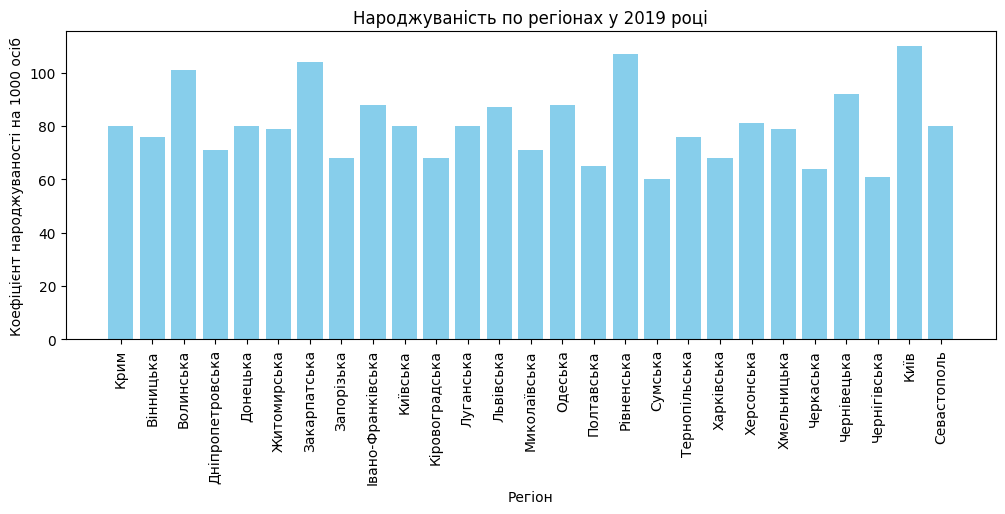

In [156]:
print("")
data_2019 = df[['Регіон', '2019']].dropna()
plt.figure(figsize=(12, 4))
plt.bar(data_2019['Регіон'], data_2019['2019'], color='skyblue')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Коефіцієнт народжуваності на 1000 осіб')
plt.xticks(rotation=90)
plt.show()

**Знайомство з Pandas. Перше завдання (друга з двох частин)**

Видалення з таблиці даних по всій країні, останній рядок таблиці


In [157]:
import pandas as pd
import numpy as np

URL="https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
TABLE_NAME = "Коефіцієнт народжуваності в регіонах України"
data = pd.read_html(URL, match=TABLE_NAME)
df = data[0]
df.replace("—", np.nan, inplace=True)
df = df[:-1]
df.head().round(2)


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN


Виведення типів всіх стовпців за допомогою dataframe.dtypes

Типів стовпців до та після заміни нечислових колонок на числові

In [158]:
print("Типи стовпців до змін:")
print(df.dtypes)

non_numeric_columns = df.columns[1:]
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

print("\nТипи стовпців після змін:")
print(df.dtypes)

Типи стовпців до змін:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

Типи стовпців після змін:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object



Відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [159]:
df.fillna(df.mean(), inplace=True)
df.head().round(2)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,111.44,80.17
1,Вінницька,224.0,192.0,142.0,124,84,112,109.00,76.00
2,Волинська,247.0,250.0,179.0,153,112,148,141.00,101.00
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.00,71.00
4,Донецька,271.0,214.0,140.0,109,61,98,82.00,80.17


Частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [160]:
missing_percentage = df.isnull().sum() / len(df) * 100
print("Частка пропусків в кожній колонці (%):")
missing_percentage

Частка пропусків в кожній колонці (%):


Регіон    0.0
1950      0.0
1960      0.0
1970      0.0
1990      0.0
2000      0.0
2012      0.0
2014      0.0
2019      0.0
dtype: float64

In [161]:
df.columns.tolist()

['Регіон', '1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']

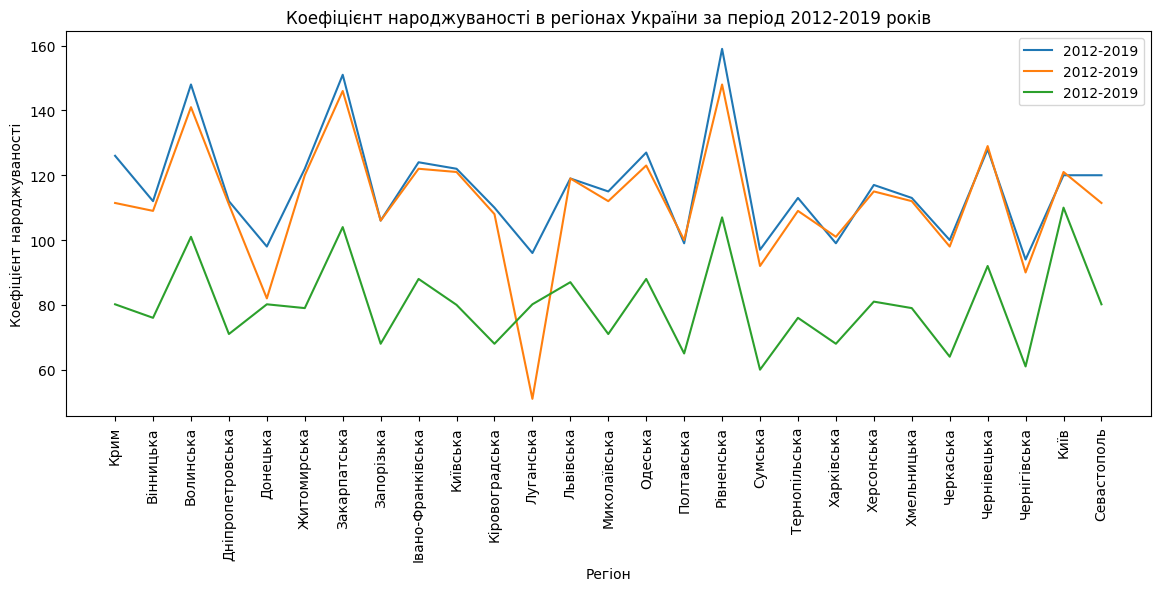

In [162]:
plt.figure(figsize=(14, 5))

if all(col in df.columns for col in ['Регіон', '2012', '2014', '2019']):
    plt.plot(df["Регіон"], df.loc[:, ['2012', '2014', '2019']].astype("float"), label="2012-2019")

    plt.title("Коефіцієнт народжуваності в регіонах України за період 2012-2019 років")
    plt.xlabel("Регіон")
    plt.ylabel("Коефіцієнт народжуваності")
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Стовпці 'Регіон' та '2012', '2014', '2019' не знайдені в DataFrame.")




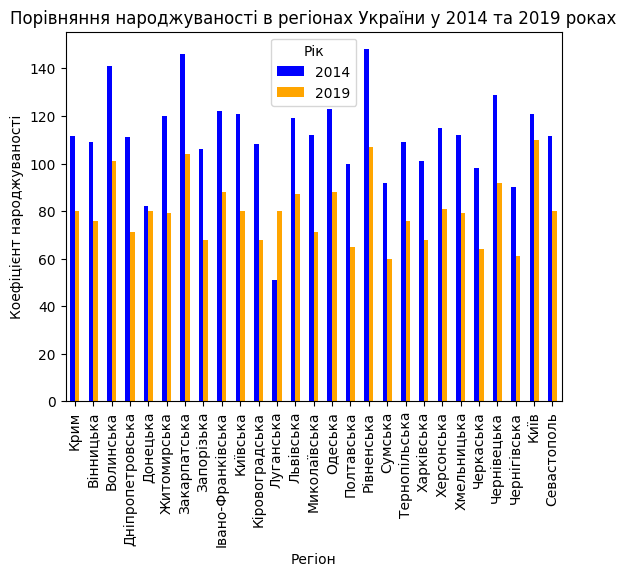

In [163]:
# plt.figure(figsize=(15, 5))
data_to_plot = df.loc[:, ['2014', '2019']].astype(float)
data_to_plot.index = df['Регіон']
data_to_plot.plot.bar(color=['blue', 'orange'])

plt.title("Порівняння народжуваності в регіонах України у 2014 та 2019 роках")
plt.xlabel("Регіон")
plt.ylabel("Коефіцієнт народжуваності")
plt.legend(title='Рік')
plt.show()


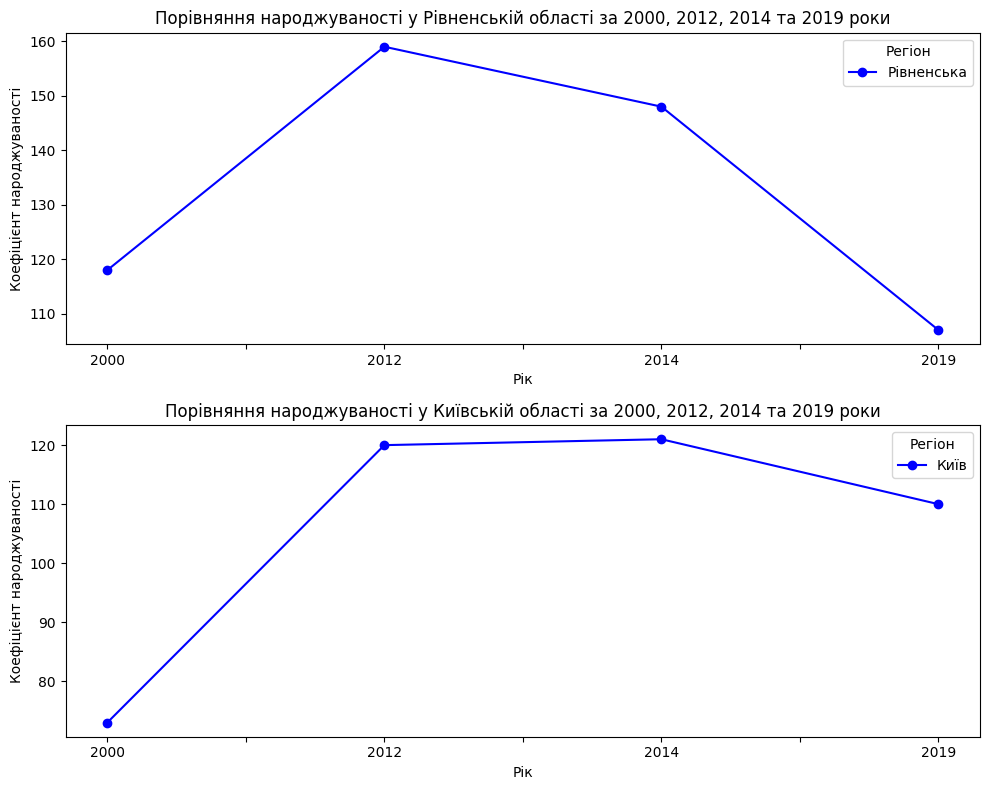

In [164]:
rivne_data = df[df['Регіон'] == 'Рівненська'].loc[:, ['2000', '2012', '2014', '2019']].astype(float)
rivne_data.index = df[df['Регіон'] == 'Рівненська']['Регіон']

kyiv_data = df[df['Регіон'] == 'Київ'].loc[:, ['2000', '2012', '2014', '2019']].astype(float)
kyiv_data.index = df[df['Регіон'] == 'Київ']['Регіон']

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

rivne_data.T.plot.line(ax=axs[0], marker='o', color=['blue', 'orange'])
kyiv_data.T.plot.line(ax=axs[1], marker='o', color=['blue', 'orange'])

axs[0].set_title('Порівняння народжуваності у Рівненській області за 2000, 2012, 2014 та 2019 роки')
axs[1].set_title('Порівняння народжуваності у Київській області за 2000, 2012, 2014 та 2019 роки')

for ax in axs:
    ax.set_xlabel("Рік")
    ax.set_ylabel("Коефіцієнт народжуваності")
    ax.legend(title='Регіон')

plt.tight_layout()
plt.show()

